In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils# performs one hot encoding
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
ytest.shape

(10000,)

In [4]:
ytrain[30000]

3

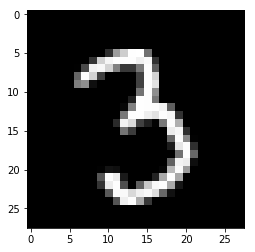

In [5]:
plt.imshow(xtrain[30000,:,:],cmap='gray')

In [0]:
X_train, X_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 0)

In [7]:
X_train.shape

(48000, 28, 28)

In [0]:
#Represent Training & Testing samples suitable for 
#tensorflow backend
x_train=X_train.reshape(X_train.shape[0],28,28,1)
x_val=X_val.reshape(X_val.shape[0],28,28,1)
x_test=xtest.reshape(xtest.shape[0],28,28,1)
#for theano (1,28,28), for tensorflow (28,28,1)

In [9]:
x_train.shape

(48000, 28, 28, 1)

In [10]:
y_train[0]

7

In [0]:
#Encoding the output class label (One-Hot Encoding)
y_train=np_utils.to_categorical(y_train)
y_val=np_utils.to_categorical(y_val)
y_test=np_utils.to_categorical(ytest)

In [26]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),border_mode='valid',input_shape=(28,28,1),activation='relu'))

W0823 06:33:01.944625 140452746966912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  
W0823 06:33:02.006994 140452746966912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 06:33:02.015808 140452746966912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

W0823 06:33:02.076667 140452746966912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(64,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [22]:
model.fit(x_train,y_train,batch_size=128,nb_epoch=20, verbose=1, validation_data=(x_val,y_val))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0823 06:35:14.327644 140452746966912 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 06:35:14.400877 140452746966912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 23s 471us/step - loss: 2.1183 - acc: 0.3132 - val_loss: 1.9379 - val_acc: 0.3692
Epoch 2/20
48000/48000 [==============================] - 21s 443us/step - loss: 1.8065 - acc: 0.3814 - val_loss: 1.6523 - val_acc: 0.3958
Epoch 3/20
48000/48000 [==============================] - 21s 442us/step - loss: 1.5844 - acc: 0.3879 - val_loss: 1.5162 - val_acc: 0.3929
Epoch 4/20
48000/48000 [==============================] - 21s 440us/step - loss: 1.4451 - acc: 0.3944 - val_loss: 1.3832 - val_acc: 0.3971
Epoch 5/20
48000/48000 [==============================] - 21s 438us/step - loss: 1.3644 - acc: 0.3950 - val_loss: 1.2997 - val_acc: 0.4031
Epoch 6/20
48000/48000 [==============================] - 21s 441us/step - loss: 1.2971 - acc: 0.3962 - val_loss: 1.2690 - val_acc: 0.4057
Epoch 7/20
48000/48000 [==============================] - 21s 439us/step - loss: 1.2613 - acc: 0.4016 - val_loss: 1.

In [23]:
score=model.evaluate(x_val,y_val)

12000/12000 [==============================] - 2s 160us/step


In [24]:
score

[0.7052510391871134, 0.67075]

In [0]:
y_predict=model.predict(x_test)

In [27]:
np.argmax(y_predict[0])

7

In [28]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 966    0    6    0    7    0    0    1    0    0]
 [   3 1119    7    0    4    0    0    0    2    0]
 [  18    2  996    1   12    0    0    3    0    0]
 [  50    0   21  927    2    0    0    6    2    2]
 [   2    2    1    0  953    0    0    0   12   12]
 [ 883    0    1    4    3    0    0    0    1    0]
 [  62    2    1    0  892    0    0    0    1    0]
 [  16    1   25    5   21    0    0  943    1   16]
 [ 942    3    8   11    5    0    0    1    3    1]
 [  66    6    5    1   35    0    0   10    6  880]]
